## Logistic Regression Assignment(Affairs Data)

## Problem Statement:

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

### Dataset

## Solution:

In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [6]:
dta =sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs >0).astype(int)


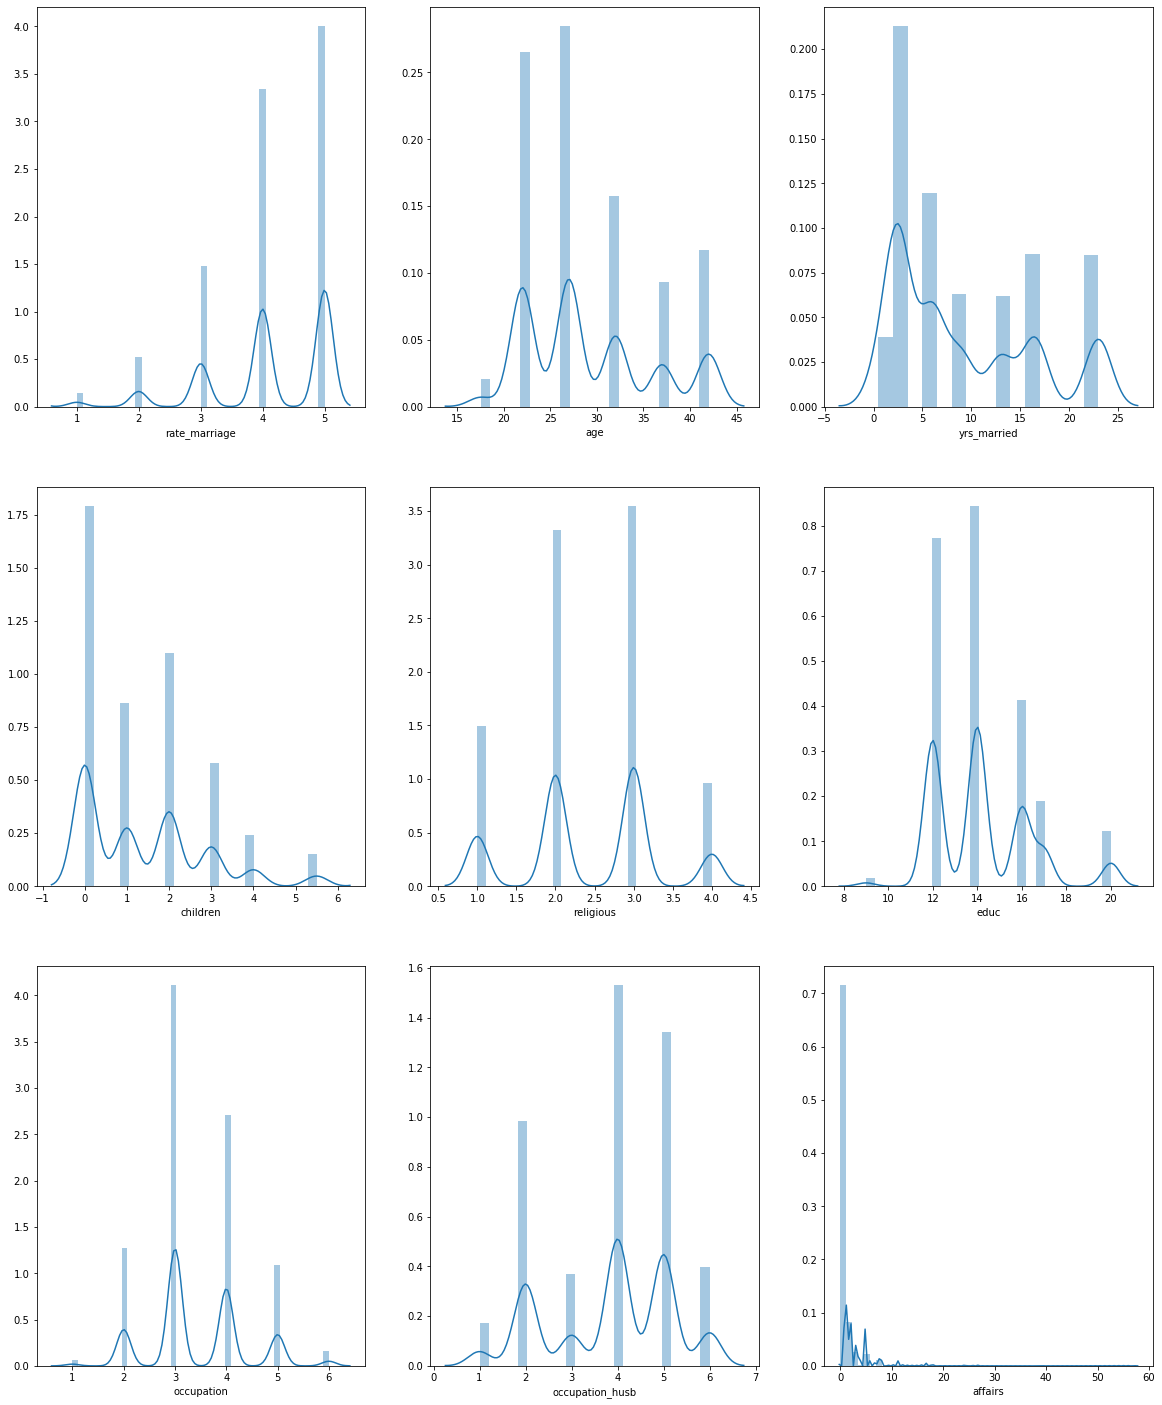

In [45]:
#let's see how data is distributed for every columns
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for col in dta:
    if plotnumber<=dta.shape[1]-1:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(dta[col])
        plt.xlabel(col)        
        plotnumber+=1
plt.show()      

In [46]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [ ]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [7]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [12]:
dta.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [18]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [20]:
y

array([1., 1., 1., ..., 0., 0., 0.])

### Build Model

In [14]:
#split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [15]:
#create logistic model object
lgreg=LogisticRegression()

In [22]:

lgreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred=lgreg.predict(X_test)

In [26]:
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [28]:
print(metrics.confusion_matrix(y_test,y_pred))

[[1167  119]
 [ 428  196]]


In [24]:
print(cross_val_score(lgreg,X,y,cv=3))

[0.71960415 0.71819039 0.7332705 ]


In [29]:
print(metrics.accuracy_score(y_test,y_pred))

0.7136125654450262


In [30]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81      1286
         1.0       0.62      0.31      0.42       624

    accuracy                           0.71      1910
   macro avg       0.68      0.61      0.61      1910
weighted avg       0.70      0.71      0.68      1910

